This notebook is used to analyze the collected data for the experiments performed to answer RQ2.

For each of the 9,998 conflicts in the dataset, 1000 random candidates were generated. 

Then, we measured the similarity between these random candidates to v1, v2, and the resolution.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

/tmp/ipykernel_11887/697132874.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_attributes = pd.read_csv('data/resolution_composition.csv')
df_attributes.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [3]:
df_dataset = pd.read_csv('data/INITIAL_DATASET.csv')
df_dataset.head()

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
0,776661,Version 1,94,98,96,If statement,https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/main/java/ne...,HttpSenderImpl.java,c3b5f5d43f5699e2e4d698bd32a74dad9ac1d477,78eceb43ad7a9dd89e7c2f36f82b0e36061e40ff,85d75a23e94054bbb8c219f21036872149150a90,5277a08c45e15394d28fa2c059746fadd4601585
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/net/threesca...,Api2Impl.java,332b6ed4e324199565e235cd915368f9bc1b43d2,4650578dee712b2b08f2ead2bf6a531f82b1e0e9,d623f491daa2f14f06f53338265d28a489138a6b,1d2ec0a2016edab9736e163e09d7a994af00ccbf
2,776697,Version 2,70,132,131,"Attribute, Method invocation",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,bndtools/bndtools/bndtools.core/src/bndtools/P...,Plugin.java,41b35cd3c4fa423382bac2a22d0da09da6008730,4bed1de20aa8580200ed6f1b4edd585c2972a0e2,7486a0c479d1d221f3dc225bf79a2cd7383e9543,04e207ec8150eaca40ccc3fb0ecda0f4312aa2c8
3,776700,Version 1,304,354,322,"Comment, For statement, If statement, Method i...",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,bndtools/bndtools/bndtools.core/src/bndtools/v...,ImportsExportsView.java,8f113c6f5d090ff539f3c342591a575b976fd23d,350da937afff3f6e47234ba0831c1976adb7c472,bd65c61548fb0eafd7101c9f480771e3faf0a6ab,3c8c593532fa0ac85312ac273ca5c8865a9430e6
4,776710,Version 2,125,131,128,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,URISanitizer.java,567eec5076644db52aef9a4ef3ac06bb1d3b1878,3bc51bd2779e15e7aced4679b7e9ce7d1306f2e4,3155ab278e684b614fc68c136b3591638c32b07d,f00081a06e3423ff926109532ffa047851c47af0


In [4]:
df_results = pd.read_csv('results_experiment_similarity_thousand.csv')[['chunk_id', 'candidate_id', 'v1_gestalt_sim', 'v2_gestalt_sim', 'solution_gestalt_sim', 'error']]
df_results

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,error
0,964152,0,0.410959,0.718954,0.568266,NaN
1,964152,1,0.331288,0.817337,0.680556,NaN
2,964152,2,0.983607,0.244344,0.290323,NaN
3,964152,3,0.289017,0.852853,0.758389,NaN
4,964152,4,0.550459,0.490706,0.564103,NaN
...,...,...,...,...,...,...
4976503,1392173,2,0.905923,0.996540,0.960000,NaN
4976504,1392173,3,0.956522,0.870432,0.910256,NaN
4976505,1392173,4,0.949833,0.956811,1.000000,NaN
4976506,1392173,5,0.665116,0.666667,0.650113,NaN


In [5]:
selected_chunks = pd.read_csv('data/chunk_ids_list.csv')
df_results = df_results[df_results['chunk_id'].isin(selected_chunks['chunk_id'].unique())]
df_results

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,error
0,964152,0,0.410959,0.718954,0.568266,NaN
1,964152,1,0.331288,0.817337,0.680556,NaN
2,964152,2,0.983607,0.244344,0.290323,NaN
3,964152,3,0.289017,0.852853,0.758389,NaN
4,964152,4,0.550459,0.490706,0.564103,NaN
...,...,...,...,...,...,...
4976503,1392173,2,0.905923,0.996540,0.960000,NaN
4976504,1392173,3,0.956522,0.870432,0.910256,NaN
4976505,1392173,4,0.949833,0.956811,1.000000,NaN
4976506,1392173,5,0.665116,0.666667,0.650113,NaN


# Overall scenario

First, we want to understand the collected data and have an overview of the scenario.

Questions:

- What is the distribution of candidates per chunk?
- How many chunks have less than 1000 candidates? How many have exactly 1000?
- What are the descriptive statistics of the candidates considering all chunks?
- What is the correlation between the variables?

#### What is the distribution of candidates per chunk?

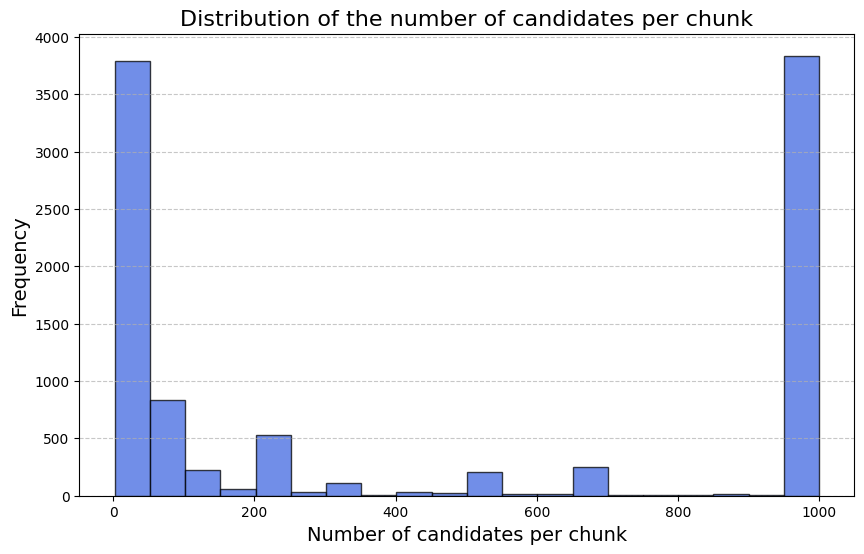

In [6]:
candidate_counts = df_results.groupby('chunk_id')['candidate_id'].count()

plt.figure(figsize=(10, 6))
plt.hist(candidate_counts, bins=20, color='royalblue', edgecolor='black', alpha=0.75)

plt.xlabel("Number of candidates per chunk", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of the number of candidates per chunk", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.yscale('log')

plt.show()

#### How many chunks have less than 1000 candidates? How many have exactly 1000?

In [7]:
df_filter = candidate_counts.reset_index()[['candidate_id']]
df_filter

,candidate_id
0,1000
1,1000
2,139
3,81
4,139
...,...
9993,7
9994,28
9995,1000
9996,28


In [8]:
print(len(df_filter[df_filter['candidate_id']<1000]))
print(len(df_filter[df_filter['candidate_id']==1000]))

6181
3817


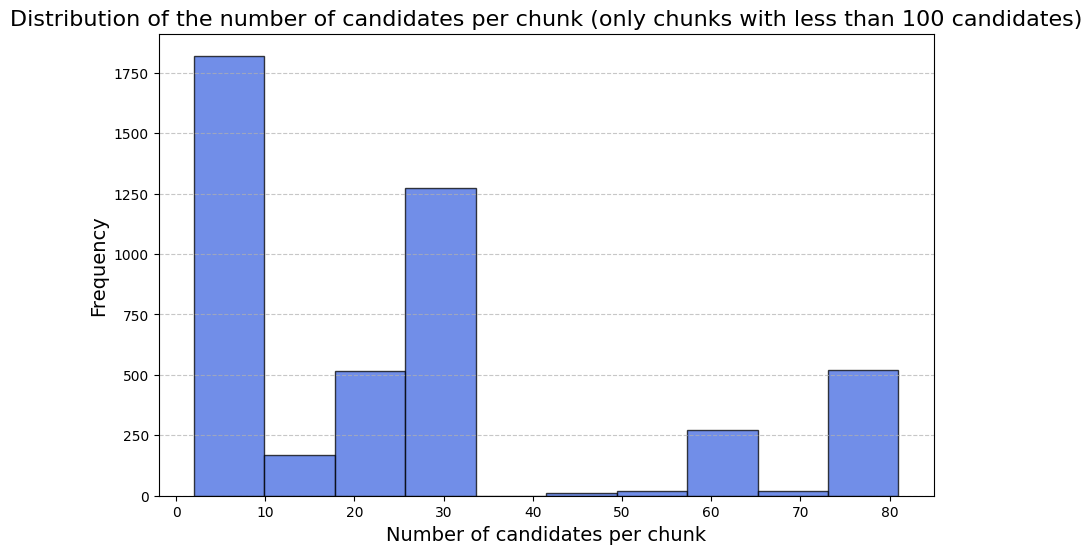

In [9]:
candidate_counts_zoom = df_filter[df_filter['candidate_id']<100]

plt.figure(figsize=(10, 6))
plt.hist(candidate_counts_zoom, color='royalblue', edgecolor='black', alpha=0.75)

plt.xlabel("Number of candidates per chunk", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of the number of candidates per chunk (only chunks with less than 100 candidates)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# plt.yscale('log')


plt.show()

#### What are the descriptive statistics of the candidates considering all chunks?

In [10]:
print(df_results['error'].unique())
print(df_results.dtypes)

[nan]
chunk_id                  int64
candidate_id              int64
v1_gestalt_sim          float64
v2_gestalt_sim          float64
solution_gestalt_sim    float64
error                   float64
dtype: object


In [11]:
columns_gestalt = []
for column in df_results.columns:
    if 'gestalt' in column:
        columns_gestalt.append(column)
df_gestalt = df_results[columns_gestalt]
df_gestalt.head()

,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim
0,0.410959,0.718954,0.568266
1,0.331288,0.817337,0.680556
2,0.983607,0.244344,0.290323
3,0.289017,0.852853,0.758389
4,0.550459,0.490706,0.564103


In [12]:
df_gestalt.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim
count,4509340.00000,4509340.00000,4509340.00000
mean,0.60611,0.61003,0.63034
std,0.22436,0.22236,0.18561
min,0.00000,0.00000,0.00000
25%,0.49132,0.49670,0.52632
50%,0.65448,0.65759,0.66478
75%,0.76401,0.76633,0.76271
max,1.00000,1.00000,1.00000


In [13]:
print(df_gestalt[['v1_gestalt_sim', 'v2_gestalt_sim', 'solution_gestalt_sim']].describe().applymap('{:,.3f}'.format).to_latex())

\begin{tabular}{llll}
\toprule
 & v1_gestalt_sim & v2_gestalt_sim & solution_gestalt_sim \\
\midrule
count & 4,509,340.000 & 4,509,340.000 & 4,509,340.000 \\
mean & 0.606 & 0.610 & 0.630 \\
std & 0.224 & 0.222 & 0.186 \\
min & 0.000 & 0.000 & 0.000 \\
25% & 0.491 & 0.497 & 0.526 \\
50% & 0.654 & 0.658 & 0.665 \\
75% & 0.764 & 0.766 & 0.763 \\
max & 1.000 & 1.000 & 1.000 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_11887/1058635564.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df_gestalt[['v1_gestalt_sim', 'v2_gestalt_sim', 'solution_gestalt_sim']].describe().applymap('{:,.3f}'.format).to_latex())


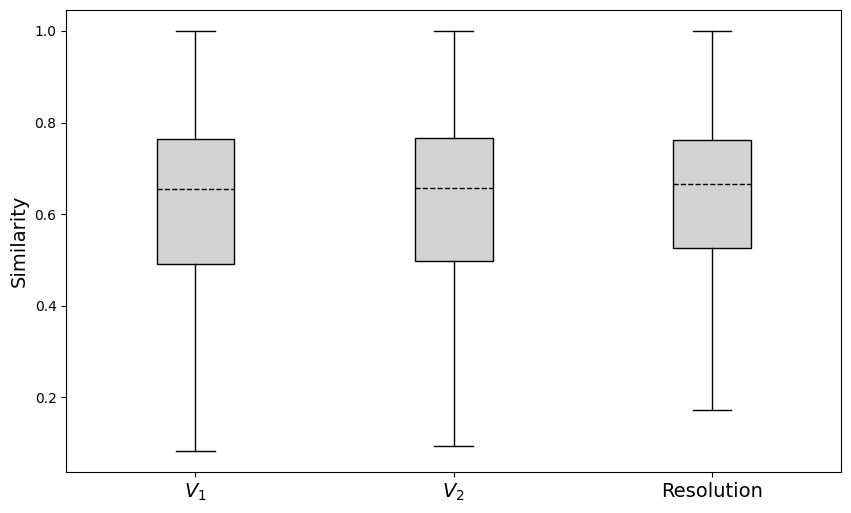

In [14]:
plt.figure(figsize=(10, 6))  
plt.boxplot([df_gestalt['v1_gestalt_sim'], df_gestalt['v2_gestalt_sim'], df_gestalt['solution_gestalt_sim']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  # Properties of the outliers

plt.ylabel('Similarity', fontsize=14)
plt.xticks([1, 2, 3], ['$V_1$', '$V_2$', 'Resolution'], fontsize=14)
# plt.title('Similarity level between random candidates and each target', fontsize=16)

# plt.savefig('figures/RQ2_boxplot.png', dpi=300)  # Save the plot as a PNG file with higher resolution
plt.show() 

#### What is the correlation between the variables?

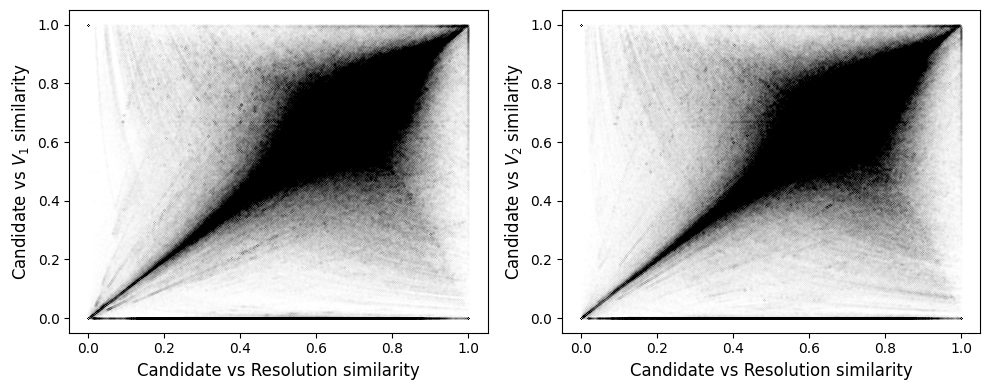

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(df_gestalt['solution_gestalt_sim'], df_gestalt['v1_gestalt_sim'], color='black', alpha=0.026, marker='.', s=0.01)
# axs[0].set_title('Candidate similarity with Resolution vs V1', fontsize=14)
axs[0].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[0].set_ylabel('Candidate vs $V_1$ similarity', fontsize=12)

axs[1].scatter(df_gestalt['solution_gestalt_sim'], df_gestalt['v2_gestalt_sim'], color='black', alpha=0.026, marker='.', s=0.01)
# axs[1].set_title('Candidate similarity with Resolution vs V2', fontsize=14)
axs[1].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[1].set_ylabel('Candidate vs $V_2$ similarity', fontsize=12)

plt.tight_layout()

# plt.suptitle('Scatter plot of candidate/resolution and candidate/parents similarity \n', y=1.02, fontsize=16)
# plt.savefig('figures/RQ2_scatter.png', dpi=300)
plt.show()

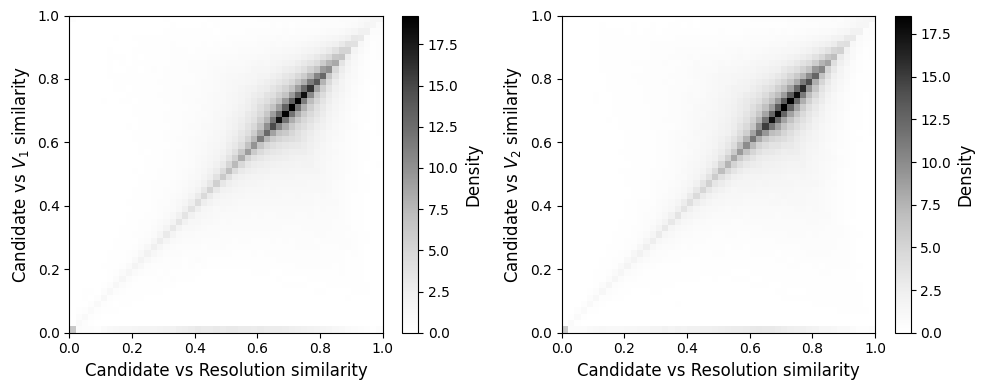

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

bins = [50, 50]  # Adjust here for more or less granular

h1 = axs[0].hist2d(df_gestalt['solution_gestalt_sim'], df_gestalt['v1_gestalt_sim'], bins=bins, cmap='Greys', density=True)
axs[0].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[0].set_ylabel('Candidate vs $V_1$ similarity', fontsize=12)

h2 = axs[1].hist2d(df_gestalt['solution_gestalt_sim'], df_gestalt['v2_gestalt_sim'], bins=bins, cmap='Greys', density=True)
axs[1].set_xlabel('Candidate vs Resolution similarity', fontsize=12)
axs[1].set_ylabel('Candidate vs $V_2$ similarity', fontsize=12)

cbar1 = fig.colorbar(h1[3], ax=axs[0])
cbar1.set_label('Density', fontsize=12)

cbar2 = fig.colorbar(h2[3], ax=axs[1])
cbar2.set_label('Density', fontsize=12)

plt.tight_layout()

plt.savefig('figures/RQ2_correlation.png', dpi=300)

In [17]:
df_gestalt.corr(method='spearman')

,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim
v1_gestalt_sim,1.000000,-0.078958,0.465832
v2_gestalt_sim,-0.078958,1.000000,0.424446
solution_gestalt_sim,0.465832,0.424446,1.000000


In [18]:
print(df_gestalt[['v1_gestalt_sim', 'v2_gestalt_sim', 'solution_gestalt_sim']].corr(method='spearman').to_latex())

\begin{tabular}{lrrr}
\toprule
 & v1_gestalt_sim & v2_gestalt_sim & solution_gestalt_sim \\
\midrule
v1_gestalt_sim & 1.000000 & -0.078958 & 0.465832 \\
v2_gestalt_sim & -0.078958 & 1.000000 & 0.424446 \\
solution_gestalt_sim & 0.465832 & 0.424446 & 1.000000 \\
\bottomrule
\end{tabular}



In [19]:
res = stats.spearmanr(df_gestalt['solution_gestalt_sim'], df_gestalt['v1_gestalt_sim'])
res

SignificanceResult(statistic=0.46583165956234107, pvalue=0.0)

In [20]:
res = stats.spearmanr(df_gestalt['solution_gestalt_sim'], df_gestalt['v2_gestalt_sim'])
res

SignificanceResult(statistic=0.4244457716184092, pvalue=0.0)

### Per chunk analysis

Questions

- What is the distribution of the descriptive statistics when considering each chunk separately?
- What is the correlation of the variables per chunk?

#### What is the distribution of the descriptive statistics when considering each chunk separately?

In [21]:
df_stats = df_results.groupby('chunk_id').describe().unstack()

In [22]:
print(df_stats['v1_gestalt_sim']['mean'].describe())
print(df_stats['v1_gestalt_sim']['std'].describe())
print(df_stats['v1_gestalt_sim']['50%'].describe())

count    9998.000000
mean        0.604986
std         0.174960
min         0.000000
25%         0.588431
50%         0.659770
75%         0.705998
max         0.918515
dtype: float64
count    9998.000000
mean        0.194351
std         0.111241
min         0.000000
25%         0.131160
50%         0.169663
75%         0.218141
max         0.707107
dtype: float64
count    9998.000000
mean        0.614720
std         0.196905
min         0.000000
25%         0.590856
50%         0.681466
75%         0.727460
max         0.995327
dtype: float64


In [23]:
print(df_stats['v2_gestalt_sim']['mean'].describe())
print(df_stats['v2_gestalt_sim']['std'].describe())
print(df_stats['v2_gestalt_sim']['50%'].describe())

count    9998.000000
mean        0.608563
std         0.171533
min         0.000000
25%         0.592723
50%         0.660487
75%         0.705383
max         0.901406
dtype: float64
count    9998.000000
mean        0.194252
std         0.111339
min         0.000000
25%         0.131780
50%         0.168386
75%         0.217972
max         0.707107
dtype: float64
count    9998.000000
mean        0.618685
std         0.192405
min         0.000000
25%         0.596030
50%         0.682059
75%         0.726071
max         0.994413
dtype: float64


In [24]:
print(df_stats['solution_gestalt_sim']['mean'].describe())
print(df_stats['solution_gestalt_sim']['std'].describe())
print(df_stats['solution_gestalt_sim']['50%'].describe())

count    9998.000000
mean        0.641503
std         0.108256
min         0.040472
25%         0.607477
50%         0.667833
75%         0.708933
max         0.963415
dtype: float64
count    9998.000000
mean        0.190650
std         0.093204
min         0.000672
25%         0.131533
50%         0.168382
75%         0.213154
max         0.707107
dtype: float64
count    9998.000000
mean        0.660843
std         0.121681
min         0.018729
25%         0.630140
50%         0.693878
75%         0.734142
max         0.963415
dtype: float64


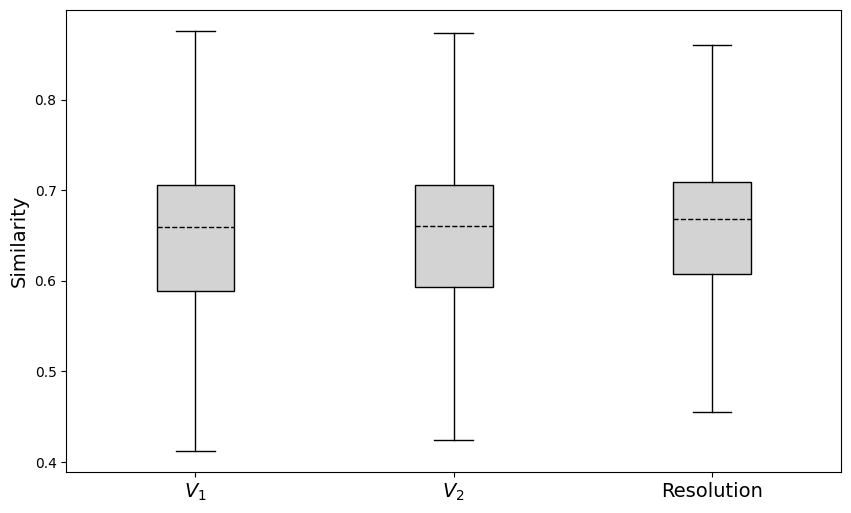

In [25]:
plt.figure(figsize=(10, 6))  
plt.boxplot([df_stats['v1_gestalt_sim']['mean'], df_stats['v2_gestalt_sim']['mean'], df_stats['solution_gestalt_sim']['mean']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  # Properties of the outliers


plt.ylabel('Similarity', fontsize=14)
plt.xticks([1, 2, 3], ['$V_1$', '$V_2$', 'Resolution'], fontsize=14)


plt.savefig('figures/RQ2_boxplot.png', dpi=300)  # Save the plot as a PNG file with higher resolution
# plt.suptitle("Distribution of the candidates' mean similarities per chunk")
plt.show() 

#### What is the correlation of the variables per chunk?

In [26]:
columns = ['chunk_id', 'v1_resolution_corr', 'v2_resolution_corr', 'v1_resolution_p', 'v2_resolution_p']
data = []           
for chunk_id in df_results['chunk_id'].unique():
    candidates = df_results[df_results['chunk_id']==chunk_id]
    v1_resolution_corr, v1_resolution_p = stats.spearmanr(candidates['v1_gestalt_sim'],candidates['solution_gestalt_sim'])
    v2_resolution_corr, v2_resolution_p = stats.spearmanr(candidates['v2_gestalt_sim'],candidates['solution_gestalt_sim'])
    
    data.append([chunk_id, v1_resolution_corr, v2_resolution_corr, v1_resolution_p, v2_resolution_p])

/tmp/ipykernel_11887/4232662881.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  v2_resolution_corr, v2_resolution_p = stats.spearmanr(candidates['v2_gestalt_sim'],candidates['solution_gestalt_sim'])
/tmp/ipykernel_11887/4232662881.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  v1_resolution_corr, v1_resolution_p = stats.spearmanr(candidates['v1_gestalt_sim'],candidates['solution_gestalt_sim'])


In [27]:
df_corr = pd.DataFrame(data, columns=columns)
df_corr

,chunk_id,v1_resolution_corr,v2_resolution_corr,v1_resolution_p,v2_resolution_p
0,964152,-0.755090,0.825556,6.822840e-27,7.475849e-36
1,783308,0.995495,0.915994,0.000000e+00,0.000000e+00
2,825766,0.757848,0.092874,2.806891e-05,6.734043e-01
3,1166841,0.689804,0.050820,3.799885e-142,1.082542e-01
4,1137463,-0.334102,0.986626,5.830479e-05,8.105835e-110
...,...,...,...,...,...
9993,1164578,0.867611,0.153233,4.362861e-305,1.125151e-06
9994,804284,0.149270,-0.664211,7.777575e-01,1.502004e-01
9995,1136584,0.985598,0.136786,0.000000e+00,1.421273e-05
9996,777957,0.945611,0.981981,1.286653e-03,8.290963e-05


In [28]:
df_corr.describe()

,chunk_id,v1_resolution_corr,v2_resolution_corr,v1_resolution_p,v2_resolution_p
count,9.998000e+03,9899.000000,9896.000000,9.493000e+03,9.489000e+03
mean,1.097219e+06,0.416245,0.387995,7.456859e-02,7.616631e-02
std,2.121029e+05,0.599586,0.615207,1.987931e-01,2.012146e-01
min,7.766620e+05,-1.000000,-1.000000,0.000000e+00,0.000000e+00
25%,9.395962e+05,-0.050922,-0.067833,4.333863e-160,8.582487e-158
50%,1.064852e+06,0.654785,0.627717,4.336394e-17,6.638891e-17
75%,1.258395e+06,0.938197,0.932433,7.901987e-03,7.113126e-03
max,1.658666e+06,1.000000,1.000000,1.000000e+00,1.000000e+00


In [29]:
df_results[df_results['chunk_id']==1301968]

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,error
4958438,1301968,0,0.835443,0.0,1.000000,NaN
4958439,1301968,1,0.994536,0.0,0.840764,NaN


In [30]:
df_corr[(df_corr['v1_resolution_corr'].isnull()) | (df_corr['v2_resolution_corr'].isnull())]

,chunk_id,v1_resolution_corr,v2_resolution_corr,v1_resolution_p,v2_resolution_p
7,1004761,-1.0,NaN,NaN,NaN
32,837704,NaN,1.0,NaN,NaN
194,780929,NaN,-1.0,NaN,NaN
328,837394,NaN,-0.2,NaN,0.704
364,1145506,NaN,-1.0,NaN,NaN
...,...,...,...,...,...
9757,1043225,-1.0,NaN,NaN,NaN
9802,1004771,-1.0,NaN,NaN,NaN
9849,1092166,NaN,-1.0,NaN,NaN
9960,1102910,NaN,-1.0,NaN,NaN


In [31]:
df_corr_cleaned = df_corr.dropna(subset=['v1_resolution_corr', 'v2_resolution_corr'])
print(f"Number of chunks in the dataset: {len(df_corr)}")
print(f"Number of chunks where the correlation is not null: {len(df_corr_cleaned)}")

Number of chunks in the dataset: 9998
Number of chunks where the correlation is not null: 9801


In [32]:
df_corr_signif_v1 = df_corr[df_corr['v1_resolution_p']<0.05]
df_corr_signif_v2 = df_corr[df_corr['v2_resolution_p']<0.05]
df_corr_signif = df_corr[(df_corr['v1_resolution_p']<0.05) & (df_corr['v2_resolution_p']<0.05)]
print(f"Number of chunks where the correlation resolution/v1 is significant (alpha < 0.05): {len(df_corr_signif_v1)}")
print(f"Number of chunks where the correlation resolution/v2 is significant (alpha < 0.05): {len(df_corr_signif_v2)}")
print(f"Number of chunks where the both correlations are significant (alpha < 0.05): {len(df_corr_signif)}")

Number of chunks where the correlation resolution/v1 is significant (alpha < 0.05): 7549
Number of chunks where the correlation resolution/v2 is significant (alpha < 0.05): 7553
Number of chunks where the both correlations are significant (alpha < 0.05): 6333


In [33]:
df_corr_cleaned.describe()

,chunk_id,v1_resolution_corr,v2_resolution_corr,v1_resolution_p,v2_resolution_p
count,9.801000e+03,9801.000000,9801.000000,9.485000e+03,9.485000e+03
mean,1.098093e+06,0.423111,0.396353,7.443348e-02,7.606246e-02
std,2.124684e+05,0.591179,0.606284,1.986688e-01,2.010945e-01
min,7.766620e+05,-1.000000,-1.000000,0.000000e+00,0.000000e+00
25%,9.397730e+05,-0.035714,-0.054745,3.789844e-160,8.582487e-158
50%,1.064937e+06,0.660401,0.632092,3.974831e-17,6.422898e-17
75%,1.270020e+06,0.937789,0.932473,7.601205e-03,7.113126e-03
max,1.658666e+06,1.000000,1.000000,1.000000e+00,1.000000e+00


In [34]:
df_corr_signif.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,chunk_id,v1_resolution_corr,v2_resolution_corr,v1_resolution_p,v2_resolution_p
count,6333.00000,6333.00000,6333.00000,6333.00000,6333.00000
mean,1105118.78762,0.51256,0.47565,0.00098,0.00097
std,216677.29586,0.58418,0.60891,0.00499,0.00483
min,776662.00000,-0.99101,-0.99799,0.00000,0.00000
25%,941476.00000,0.25350,0.14397,0.00000,0.00000
50%,1069400.00000,0.81085,0.78887,0.00000,0.00000
75%,1295311.00000,0.95776,0.95139,0.00000,0.00000
max,1658666.00000,1.00000,1.00000,0.04985,0.04987


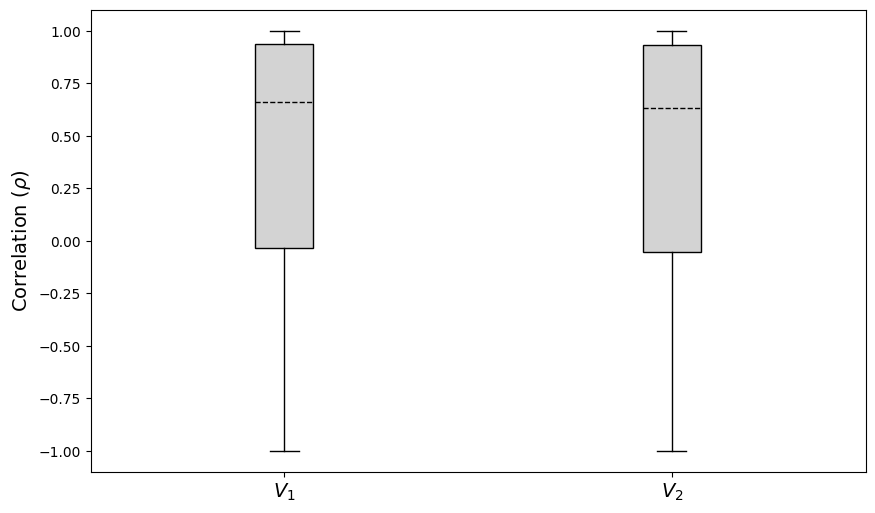

In [35]:
plt.figure(figsize=(10, 6))  
plt.boxplot([df_corr_cleaned['v1_resolution_corr'], df_corr_cleaned['v2_resolution_corr']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  # Properties of the outliers

plt.ylabel('Correlation ($\\rho$)', fontsize=14)
plt.xticks([1, 2], ['$V_1$', '$V_2$'], fontsize=14)
# plt.title(f"Distribution of the correlations (n={len(df_corr_cleaned):,})", fontsize=16)

# plt.savefig('figures/RQ2_correlation_distribution.png', dpi=300)  # Save the plot as a PNG file with higher resolution
plt.show()  # Show the plot

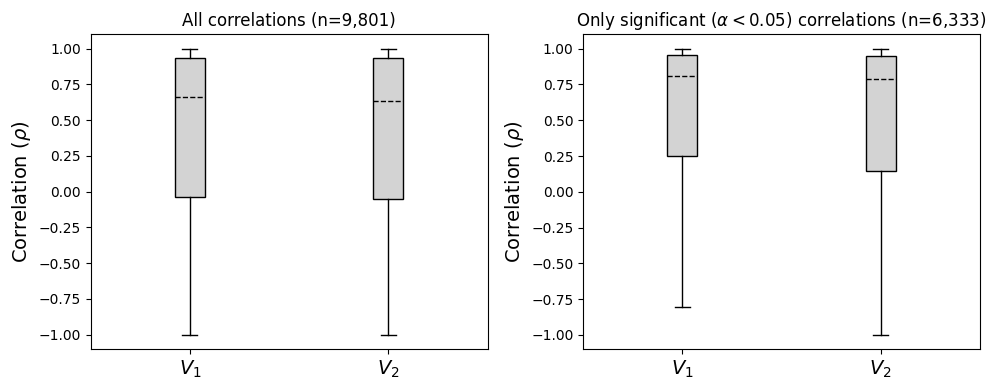

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].boxplot([df_corr_cleaned['v1_resolution_corr'], df_corr_cleaned['v2_resolution_corr']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  
axs[0].set_title(f"All correlations (n={len(df_corr_cleaned):,})")
axs[0].set_ylabel('Correlation ($\\rho$)', fontsize=14)
axs[0].set_xticks([1, 2], ['$V_1$', '$V_2$'], fontsize=14)


axs[1].boxplot([df_corr_signif['v1_resolution_corr'], df_corr_signif['v2_resolution_corr']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  
axs[1].set_title(f"Only significant ($\\alpha<0.05$) correlations (n={len(df_corr_signif):,})")
axs[1].set_ylabel('Correlation ($\\rho$)', fontsize=14)
axs[1].set_xticks([1, 2], ['$V_1$', '$V_2$'], fontsize=14)
# plt.suptitle('Correlation between similarities candidate/parent and candidate/resolution')
plt.tight_layout()



plt.savefig('figures/RQ2_correlation_distribution.png', dpi=300)
plt.show()

#### Not used

In [37]:
# df_chunk_details = pd.read_csv('data/dataset_details.csv')
# df_all = df_attributes.merge(df_results, on='chunk_id')
# df_all = df_all.merge(df_chunk_details, on='chunk_id')
# df_all

In [38]:
# print(f"{len(df_gestalt[df_gestalt['v1_gestalt_sim']==0])} ({(len(df_gestalt[df_gestalt['v1_gestalt_sim']==0])/len(df_gestalt)*100):.2f}%) of the chunks have the similarity between the candidate and v1 = 0 ")
# print(f"{len(df_gestalt[df_gestalt['v2_gestalt_sim']==0])} ({(len(df_gestalt[df_gestalt['v2_gestalt_sim']==0])/len(df_gestalt)*100):.2f}%) of the chunks have the similarity between the candidate and v2 = 0 ")
# print(f"{len(df_all[df_all['candidate_size']==0])} ({(len(df_all[df_all['candidate_size']==0])/len(df_all)*100):.2f}%) of the chunks have an empty candidate ")